# Importing libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

# Importing the dataset

In [ ]:
data = keras.datasets.cifar10
data

<module 'keras.api._v2.keras.datasets.cifar10' from '/usr/local/lib/python3.7/dist-packages/keras/api/_v2/keras/datasets/cifar10/__init__.py'>

In [ ]:
df = data.load_data()

In [ ]:
(X_train,y_train),(x_test,y_test) = df

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

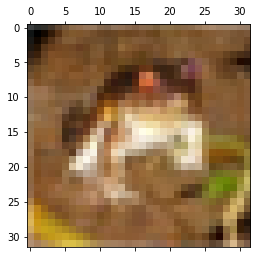

In [ ]:
plt.matshow(X_train[0])

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
y_test.ndim

2

In [ ]:
x_test.ndim

4

In [ ]:
X_train_flat = X_train.reshape(-1,32*32*3)
X_test_flat = x_test.reshape(-1,32*32*3)

In [ ]:
y_train_flat = y_train.reshape(-1,)
y_test_flat = y_test.reshape(-1,)

In [ ]:
y_train_flat.ndim

1

In [ ]:
X_train_flat.shape

(50000, 3072)

# ANN Model Creation

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential([
                    #First Hidden layer
                    Dense(units=10,input_shape=(3072,),activation='sigmoid'),
                    #Second Hidden layer
                    Dense(units=20,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Training the model

In [ ]:
model.fit(X_train_flat,y_train_flat, epochs=2)

Epoch 1/2
1563/1563 [==============================] - 5s 3ms/step - loss: 2.3033 - accuracy: 0.0986
Epoch 2/2
1563/1563 [==============================] - 5s 3ms/step - loss: 2.3033 - accuracy: 0.0973


In [ ]:
y_pred = model.predict(X_test_flat)

In [ ]:
y_pred

array([[7.8996795e-01, 7.8906882e-01, 7.8105110e-01, ..., 3.5322552e-07,
        4.2541106e-07, 6.7271407e-07],
       [7.8996795e-01, 7.8906882e-01, 7.8105110e-01, ..., 3.5322552e-07,
        4.2541106e-07, 6.7271407e-07],
       [7.8996795e-01, 7.8906882e-01, 7.8105110e-01, ..., 3.5322552e-07,
        4.2541106e-07, 6.7271407e-07],
       ...,
       [7.8996795e-01, 7.8906882e-01, 7.8105110e-01, ..., 3.5322552e-07,
        4.2541106e-07, 6.7271407e-07],
       [7.8996795e-01, 7.8906882e-01, 7.8105110e-01, ..., 3.5322552e-07,
        4.2541106e-07, 6.7271407e-07],
       [7.8996795e-01, 7.8906882e-01, 7.8105110e-01, ..., 3.5322552e-07,
        4.2541106e-07, 6.7271407e-07]], dtype=float32)

In [ ]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [ ]:
model.evaluate(X_test_flat,y_test_flat)

313/313 [==============================] - 1s 2ms/step - loss: 2.3034 - accuracy: 0.1000


[2.3034136295318604, 0.10000000149011612]

In [ ]:
loss, acc = model.evaluate(X_test_flat, y_test_flat, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.100
